In [ ]:
!pip install opencv-python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
conda install conda-forge::opencv

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("SimpleThresholding1.png", cv2.IMREAD_GRAYSCALE)

# Step 1: Denoise (optional)
blur = cv2.GaussianBlur(img, (5,5), 0)

# Step 2: Threshold (invert so objects = white)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.i
# Step 3: Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert grayscale to BGR for visualization
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)


# Step 4: Draw contours and labels
for i, cnt in enumerate(contours):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(output, (x,y), (x+w, y+h), (0,255,0), 2)
    cv2.putText(output, f"Obj {i+1}", (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

# Save or show result
cv2.imwrite("recognized_objects.png", output)
# cv2.imshow("Objects", output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/smooth.dispatch.cpp:618: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'


In [15]:
try:
  num = 10/0 #If there is some error that is going to happen here..
except:
  num = 10/(0+0.01) #Then you can perform this

In [16]:
num = 10/0

ZeroDivisionError: division by zero

In [17]:
try:
  num = 11/0
except ValueError:
  print("Boss this is a value error")
except ZeroDivisionError:
  print("You tried to divide by zero")

You tried to divide by zero


In [18]:
try:
  num = 11/0
except Exception as error:
  print(error)

division by zero


Detected 721 keypoints, descriptor shape = (721, 128)


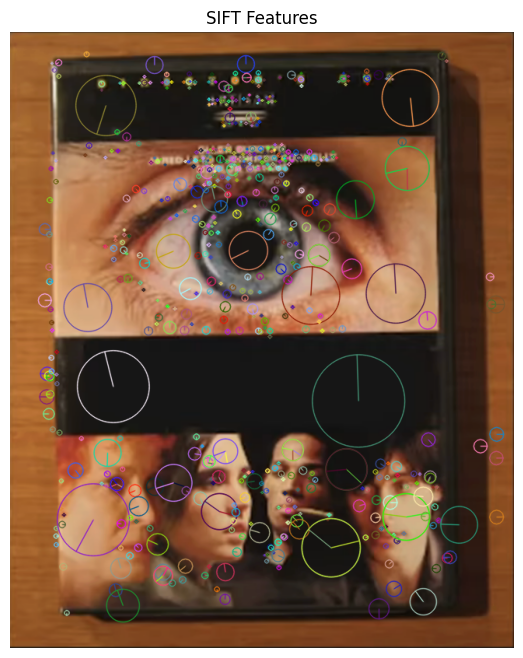

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Img1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints & compute descriptors
kps, desc = sift.detectAndCompute(gray, None)

print(f"Detected {len(kps)} keypoints, descriptor shape = {desc.shape}")

# Draw keypoints (location, scale, orientation)
vis = cv2.drawKeypoints(
    img, kps, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Show
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("SIFT Features")
plt.axis("off")
plt.show()


#First GEt Data
# pre-processing - Impurities..
# pre-processing - Feature Engineering (feature scaling)
# Feature selection

In [20]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Img1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
img.shape

(792, 648)

In [22]:
(h,w) = img.shape
center = (w//2,h//2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M, (w,h))

In [23]:
#initialize our SIFT detector
sift = cv2.SIFT_create()

In [24]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(rotated,None)

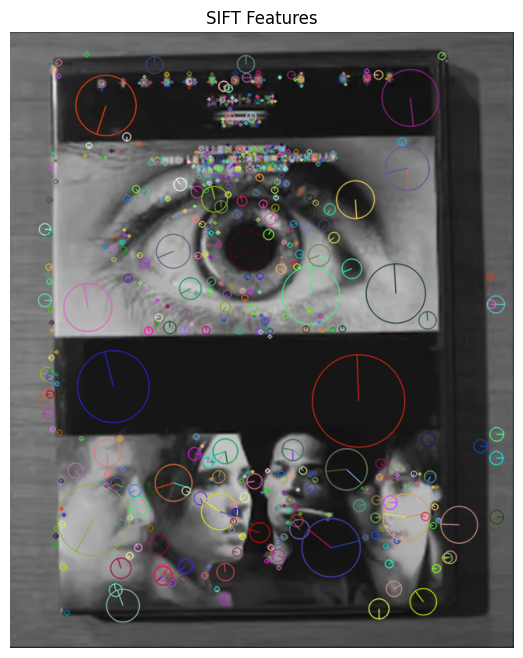

In [25]:
# Draw keypoints (location, scale, orientation)
vis = cv2.drawKeypoints(
    img, kp1, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Show
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("SIFT Features")
plt.axis("off")
plt.show()

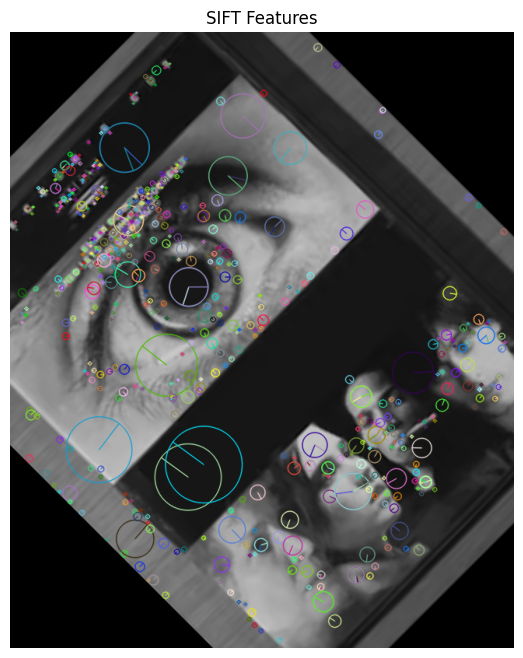

In [26]:
# Draw keypoints (location, scale, orientation)
vis = cv2.drawKeypoints(
    rotated, kp2, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Show
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("SIFT Features")
plt.axis("off")
plt.show()

In [40]:
# --- BFMatcher + KNN (k=2) ---
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
knn = bf.knnMatch(des1, des2, k=2)

# Lowe’s ratio test
ratio = 0.75
matches = []
for m, n in knn:
    if m.distance < ratio * n.distance:
        matches.append(m)
print(f"Good matches after ratio test: {len(matches)}")

Good matches after ratio test: 506


In [41]:
# sort by distance and keep best N
matches = sorted(matches, key=lambda m: m.distance)
N = 50
matches = matches[:N]

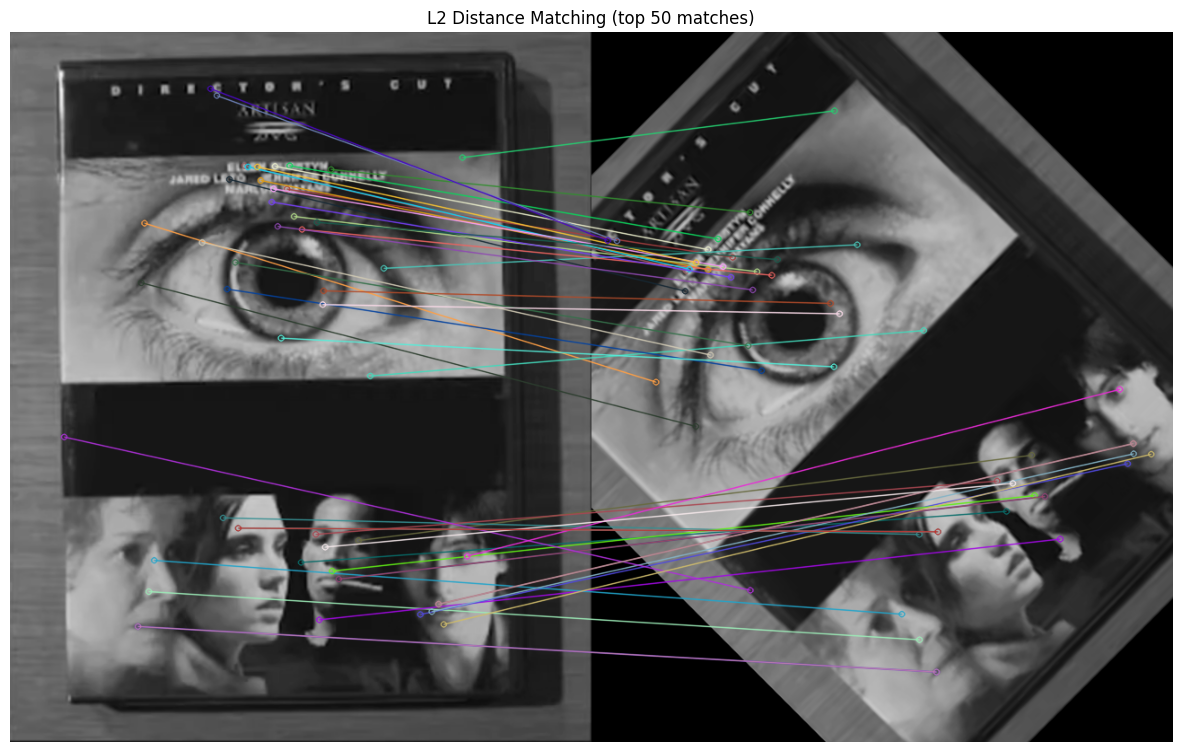

In [42]:
# --- Draw matches ---
match_vis = cv2.drawMatches(
    img, kp1, rotated, kp2, matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(match_vis, cv2.COLOR_BGR2RGB))
plt.title(f"L2 Distance Matching (top {N} matches)")
plt.axis("off")
plt.show()

In [37]:
#second way.. without BFM
matches = []
for i, d1 in enumerate(des1):
    # compute distances to all descriptors in image2
    dists = np.linalg.norm(des2 - d1, axis=1)
    j = np.argmin(dists)
    matches.append(cv2.DMatch(_queryIdx=i, _trainIdx=j, _distance=dists[j]))

In [38]:
# sort by distance and keep best N
matches = sorted(matches, key=lambda m: m.distance)
N = 50
matches = matches[:N]

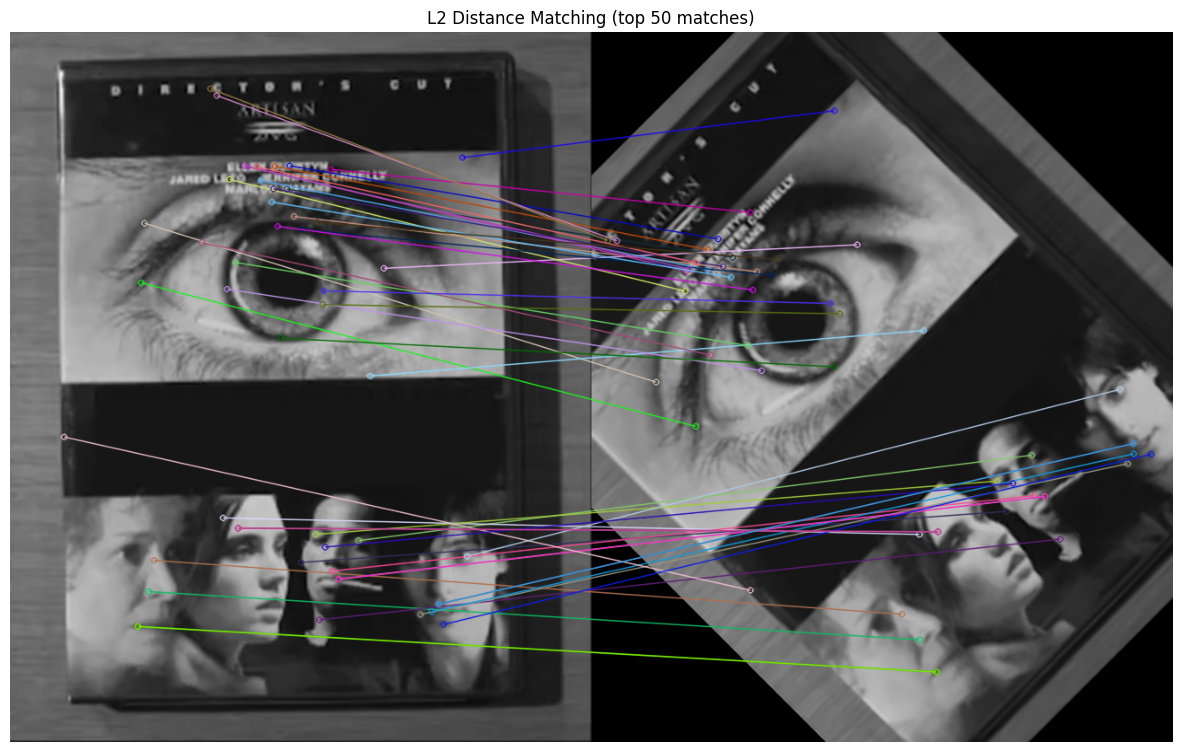

In [39]:
# --- Draw matches ---
match_vis = cv2.drawMatches(
    img, kp1, rotated, kp2, matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(match_vis, cv2.COLOR_BGR2RGB))
plt.title(f"L2 Distance Matching (top {N} matches)")
plt.axis("off")
plt.show()